In [ ]:
# QUESTO FILE ANALIZZA IN MODO PIù GENERALE GLI ORDINI CON VOLUMI ALTI CON TIMEFRAME MAGGIORI UGUALI A 15 MINUTI
# L'ANALISI NON HA PORTATO AD UN RISULTATO SODDISFACENTE


from Functions import total_function_multiprocessing
from Helpers import create_event_keys
from time import sleep
import json

# if True, the analysis starts from the current event-keys used in production
# else, it starts an analysis based on the keys in "event_keys" folder
KEEP_PRODUCTION_ANALYSIS = True

if not KEEP_PRODUCTION_ANALYSIS:
    analysis_name = '2023-2024-analysis-10-250-higherfrequency'
    list_minutes = '1440'
    event_keys_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/event_keys/event_keys.json"
    event_keys = create_event_keys(event_keys_path, list_minutes, analysis_name)
else:
    riskmanagement_json_prod_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/riskmanagement.json"
    with open(riskmanagement_json_prod_path, 'r') as file:
        # Retrieve shared memory for JSON data and "start_interval"
        riskmanagement_json_prod = json.load(file)
        event_keys = list(riskmanagement_json_prod.keys())

n_processes = 8
analysis_timeframe=7

UNLOCK = True
n_iterations = 10

for i in range(n_iterations):
    if UNLOCK:
        shared_data = total_function_multiprocessing(event_keys, analysis_timeframe, n_processes, KEEP_PRODUCTION_ANALYSIS) 
        iterazione = i+1
    msg=f'{iterazione}/{n_iterations} COMPLETED'
    print(msg)

    print('sleeping')
    sleep(5)

In [1]:
#DOWNLOAD AND SHOW OUTPUT FROM TOTAL MULTIPROCESSING

import sys
sys.path.insert(0,'..')
from Functions import download_show_output
from Helpers import filter_complete_info_by_current_eventkeys
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', None)

minimum_event_number = 1
minimum_event_number_list = [minimum_event_number]
mean_threshold = -10
frequency_threshold = 0
std_multiplier = 10
early_validation = False
# file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-sell-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-sell-10-250-highfrequency.json"]

file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/analysis.json"]
start_analysis= datetime(2025,1,1)
early_validation = datetime(2026,1,1)
xth_percentile=100
filter_field='mean' #mean, std, max, min
output, complete_info = download_show_output(minimum_event_number=minimum_event_number,mean_threshold=mean_threshold, frequency_threshold=frequency_threshold,
                                              early_validation=early_validation, std_multiplier=std_multiplier, file_paths=file_paths,
                                                start_analysis=start_analysis, DELETE_99_PERCENTILE=True, filter_field=filter_field, xth_percentile=xth_percentile)


output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)

df = pd.DataFrame(output).transpose()
n_event_keys = len(df['mean'])
print(f'Number of event_keys: {n_event_keys}')
daily_frequency_all_events = int(sum(df['frequency/month']) / 30)
print(f'Daily frequency of events: {daily_frequency_all_events}')

df.sort_values(by=['mean'], ascending=False)

#df.sort_values(by=['lower_bound'], ascending=False)

/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Filtered 17 event_keys
Number of event_keys: 23
Daily frequency of events: 2


,mean,std,max,min,median_max,median_min,standings,n_coins,n_events,upper_bound,lower_bound,frequency/month
buy_vol_15m:0.25/vol_15m:20/timeframe:1440/lvl:250,1.88,4.68,8.67,-5.43,3.68,-2.18,188.07,24.0,30.0,6.56,-2.80,2.47
buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250,1.56,3.59,8.08,-4.60,5.20,-1.87,193.96,20.0,24.0,5.15,-2.03,1.97
buy_vol_15m:0.25/vol_15m:2/timeframe:1440/lvl:10,0.34,1.97,3.75,-3.98,3.28,-1.71,6.54,8.0,26.0,2.31,-1.63,2.14
buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150,0.23,3.60,6.35,-5.81,4.02,-3.33,102.34,35.0,59.0,3.83,-3.37,4.85
buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50,0.12,3.10,5.27,-5.67,3.99,-3.23,27.50,25.0,48.0,3.22,-2.98,3.95
buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150,0.06,4.50,6.56,-7.45,3.58,-4.33,103.19,45.0,73.0,4.56,-4.44,6.00
buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50,-0.11,3.08,4.56,-5.39,3.44,-4.23,38.19,12.0,21.0,2.97,-3.19,1.73
buy_vol_1m:0.15/vol_1m:100/timeframe:1440/lvl:250,-0.23,3.53,6.09,-5.89,4.20,-3.15,182.68,29.0,38.0,3.30,-3.76,3.12
buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150,-0.25,3.86,5.93,-6.80,3.72,-4.24,98.16,35.0,58.0,3.61,-4.11,4.77
buy_vol_1m:0.15/vol_1m:10/timeframe:1440/lvl:10,-0.30,2.10,3.23,-4.50,3.00,-2.66,6.27,8.0,37.0,1.80,-2.40,3.04


In [2]:
output

{'buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150': {'mean': -1.28,
  'std': 2.39,
  'max': 2.84,
  'min': -5.41,
  'median_max': 2.53,
  'median_min': -3.6300000000000003,
  'standings': 110.57,
  'n_coins': 13,
  'n_events': 21,
  'upper_bound': 1.11,
  'lower_bound': -3.67,
  'frequency/month': 1.73},
 'buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150': {'mean': -1.23,
  'std': 2.84,
  'max': 3.91,
  'min': -6.18,
  'median_max': 2.57,
  'median_min': -2.84,
  'standings': 106.12,
  'n_coins': 10,
  'n_events': 16,
  'upper_bound': 1.6099999999999999,
  'lower_bound': -4.07,
  'frequency/month': 1.32},
 'buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150': {'mean': -1.1,
  'std': 1.38,
  'max': 2.0,
  'min': -3.82,
  'median_max': 1.95,
  'median_min': -2.38,
  'standings': 102.07,
  'n_coins': 10,
  'n_events': 15,
  'upper_bound': 0.2799999999999998,
  'lower_bound': -2.48,
  'frequency/month': 1.23},
 'buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50': {'mean': -0.11,
  'std': 3.08000

In [5]:
complete_info['buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150'].keys()

dict_keys(['info', 'n_coins', 'events', 'frequency/month'])

In [ ]:
# from Helpers import filter_complete_info_by_current_eventkeys
# output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)


In [ ]:
# from Helpers import create_rismanagement_from_complete_info
# create_rismanagement_from_complete_info(complete_info)

In [ ]:
from Helpers import frequency_events_analysis
frequency_events_analysis(complete_info)


In [ ]:
from Analysis2023.Functions import check_investment_amount
check_investment_amount(complete_info, output, investment_amount=150)

In [ ]:
from Helpers import get_timeseries
from Helpers import get_analysis


output, complete_info = get_analysis()
event_keys_filter = []
check_past=180 #minutes before event trigger
check_future=180 #minutes after the end of event (usually after 1 days from event trigger)
jump=0.04 #jump from price levels in terms of cumulative volume order (from 0 to 1)
limit=0.25 #get the window of price change (from 0 to 1) (e.g. 0.15 check only the orders whose level is within 15% price change from current price)
price_change_jump = 0.025 #range of price change (used in get_price_levels for bid/ask_order_distribution)
max_limit = 0.2 #what is the max change, beyond that I won't consider triggers ---> ( max_price - initial_price ) / initial_price
price_drop_limit = 0.05  #current drop from max. The minimum drop from the maximum for triggering events ---> abs( (current_price - max_price) / max_price )
distance_jump_to_current_price = 0.03 # minimum distance from jump
max_ask_order_distribution_level = 0.05 # max percentage of ask volume at the first level (level is based on price_change_jump)
last_i_ask_order_distribution= 1 # how many last order distribution obs I consider, an np.mean is executed
save_plot=False
analyze=True
#event_keys_filter = ['buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50', 'buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150']
get_timeseries(complete_info, check_past=check_past, check_future=check_future, jump=jump, limit=limit, event_keys_filter = event_keys_filter,
                   price_change_jump = price_change_jump, max_limit = max_limit, price_drop_limit = price_drop_limit,
                     distance_jump_to_current_price = distance_jump_to_current_price, max_ask_order_distribution_level = max_ask_order_distribution_level,
                       last_i_ask_order_distribution= last_i_ask_order_distribution, save_plot=save_plot, analyze=analyze)


/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Filtered 0 event_keys
Number of event_keys: 23
Daily frequency of events: 1
[-0.5, -0.4, -0.3, -0.2, -0.1, -0.05, 0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
[0, 0, 1, 0, 0, 14, 15, 8, 4, 3, 3, 1]


/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


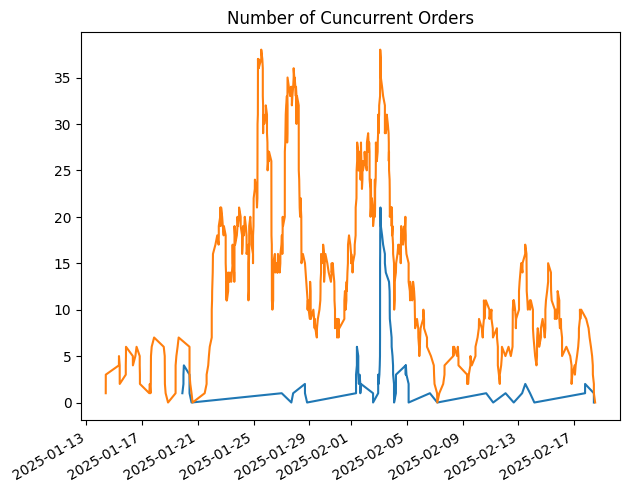

49
401


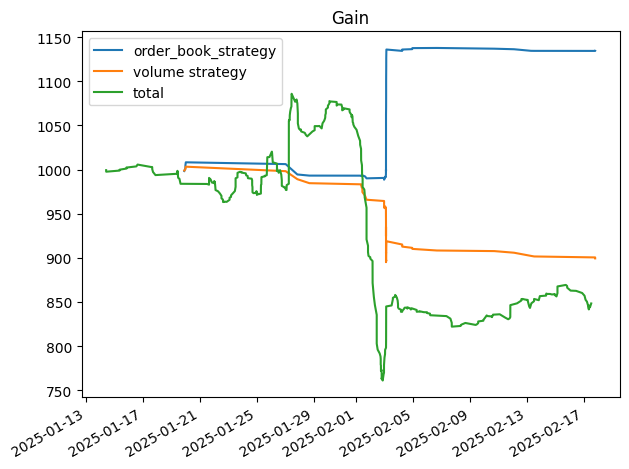

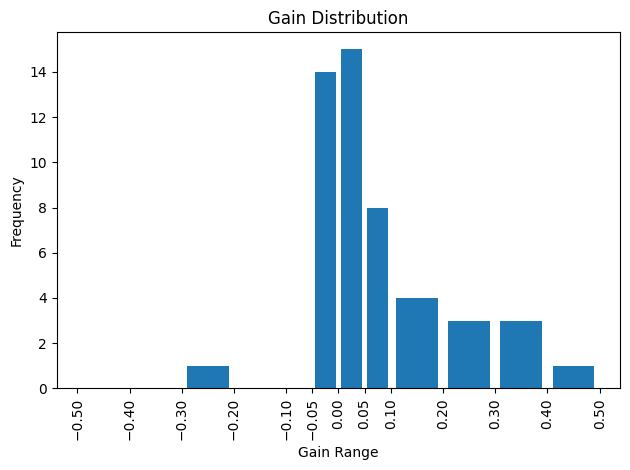

Initial Investment: 1000 euro
Invesment per event: 47.62 euro
Commission: 3.33 euro
Total Investment 2333.33
Average Profit per event: 5.91%
Profit: 134.49 euro
Number of orders: 49
{'event_keys': ['buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250', 'buy_vol_5m:0.8/vol_5m:50/timeframe:1440/lvl:250', 'buy_vol_1m:0.15/vol_1m:100/timeframe:1440/lvl:250', 'buy_vol_1m:0.85/vol_1m:100/timeframe:1440/lvl:250', 'buy_vol_15m:0.25/vol_15m:2/timeframe:1440/lvl:10', 'buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150', 'buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50', 'buy_vol_15m:0.8/vol_15m:20/timeframe:1440/lvl:250', 'buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150', 'buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150', 'buy_vol_15m:0.25/vol_15m:20/timeframe:1440/lvl:250', 'buy_vol_5m:0.8/vol_5m:10/timeframe:1440/lvl:50', 'buy_vol_15m:0.8/vol_15m:3/timeframe:1440/lvl:50', 'buy_vol_1m:0.15/vol_1m:10/timeframe:1440/lvl:10', 'buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150', 'buy_vol_5m:0.25/vol_5m:20

,event_keys,n_events,gain,max,min,2025-01,2025-02
0,buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250,2,-2.29,4.22,-18.80,None,-2.29 - 4.88 / max:4.22 / min:-18.8
1,buy_vol_5m:0.8/vol_5m:50/timeframe:1440/lvl:250,3,0.73,2.71,-4.39,0.0 - 1.21 / max:2.64 / min:-3.59,1.09 - 1.76 / max:2.74 / min:-4.79
2,buy_vol_1m:0.15/vol_1m:100/timeframe:1440/lvl:250,4,-8.60,6.78,-18.52,-24.51 - 6.74 / max:17.1 / min:-22.02,-3.3 - 4.21 / max:3.34 / min:-17.35
3,buy_vol_1m:0.85/vol_1m:100/timeframe:1440/lvl:250,5,0.62,2.61,-4.27,-0.09 - 1.21 / max:2.64 / min:-3.6,0.8 - 1.57 / max:2.61 / min:-4.44
4,buy_vol_15m:0.25/vol_15m:2/timeframe:1440/lvl:10,0,NaN,NaN,NaN,None,None
5,buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150,1,7.06,4.07,-4.75,7.06 - 3.91 / max:4.07 / min:-4.75,None
6,buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50,1,37.11,15.52,-23.52,None,37.11 - 17.58 / max:15.52 / min:-23.52
7,buy_vol_15m:0.8/vol_15m:20/timeframe:1440/lvl:250,2,0.84,2.44,-4.73,0.04 - 1.14 / max:2.41 / min:-3.73,1.64 - 1.94 / max:2.46 / min:-5.73
8,buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150,3,3.66,5.34,-9.27,1.84 - 4.79 / max:6.16 / min:-7.65,7.32 - 6.44 / max:3.71 / min:-12.52
9,buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150,1,7.06,4.57,-4.44,7.06 - 4.11 / max:4.57 / min:-4.44,None


In [ ]:
from Helpers import plot_strategy_result
df_events_overview, df_event_keys_overview = plot_strategy_result()

df_event_keys_overview.sort_values(by=['gain'], ascending=False)

In [ ]:
from Helpers import get_plots
from IPython.display import Image, display
left_gain = -1
right_gain = -0.05
paths_png = get_plots(left_gain, right_gain)
